In [450]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [451]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [452]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [453]:
df_Singapore=df[df['country']=='Singapore']
df_Singapore.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
21,22,Singapore,Singapore,Studio,Fully-Furnished,4175,2926456,2008,1,2,...,73930,1250966,20,4275,1675490,0.13,2,8,9,0
30,31,Singapore,Singapore,Townhouse,Semi-Furnished,3492,2446173,1982,0,8,...,99460,1086669,30,15915,1359504,0.07,7,5,5,1
55,56,Singapore,Singapore,Independent House,Unfurnished,1774,1243943,1992,6,7,...,69240,667568,10,11565,576375,0.11,8,10,3,1
77,78,Singapore,Singapore,Townhouse,Semi-Furnished,2272,1594494,2013,6,8,...,99180,1317857,10,14075,276637,0.15,3,4,7,0
98,99,Singapore,Singapore,Independent House,Fully-Furnished,4329,3032187,1978,5,3,...,81605,2520304,15,18865,511883,0.27,2,5,5,0


#### We will remove irrelevant variables and avoid model cheating.

In [454]:
df_Singapore = df_Singapore.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [455]:
df_Singapore.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
21,Singapore,Studio,Fully-Furnished,4175,2926456,2008,2,1,0,1
30,Singapore,Townhouse,Semi-Furnished,3492,2446173,1982,8,1,1,0
55,Singapore,Independent House,Unfurnished,1774,1243943,1992,7,5,0,0
77,Singapore,Townhouse,Semi-Furnished,2272,1594494,2013,8,1,0,1
98,Singapore,Independent House,Fully-Furnished,4329,3032187,1978,3,2,1,0


In [456]:
df_Singapore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15278 entries, 21 to 199991
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15278 non-null  object
 1   property_type       15278 non-null  object
 2   furnishing_status   15278 non-null  object
 3   property_size_sqft  15278 non-null  int64 
 4   price               15278 non-null  int64 
 5   constructed_year    15278 non-null  int64 
 6   rooms               15278 non-null  int64 
 7   bathrooms           15278 non-null  int64 
 8   garage              15278 non-null  int64 
 9   garden              15278 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [457]:
df_Singapore.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15278.000000,1.527800e+04,15278.000000,15278.000000,15278.000000,15278.000000,15278.000000
mean,3198.687917,2.239027e+06,1991.475128,4.493324,2.733669,0.500196,0.496007
std,1609.786816,1.126847e+06,18.539630,2.290124,1.833648,0.500016,0.500000
min,400.000000,2.752330e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1816.000000,1.270253e+06,1975.000000,2.000000,1.000000,0.000000,0.000000
50%,3180.000000,2.226014e+06,1991.000000,4.000000,2.000000,1.000000,0.000000
75%,4586.750000,3.210005e+06,2008.000000,6.000000,4.000000,1.000000,1.000000
max,6000.000000,4.202732e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [458]:
df_Singapore.shape

(15278, 10)

In [459]:
df_Singapore.value_counts()

country    property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
Singapore  Apartment      Fully-Furnished    407                 281571   2015              6      5          1       0         1
           Townhouse      Fully-Furnished    1085                762820   2000              2      2          0       1         1
                                             1000                704648   2017              8      3          0       0         1
                                             1009                702578   1994              7      4          1       0         1
                                             1027                719374   1969              2      1          0       1         1
                                                                                                                               ..
           Farmhouse      Unfurnished        5612                3930565  2015              4  

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999997         -0.008613  0.005326   
price                         0.999997  1.000000         -0.008559  0.005287   
constructed_year             -0.008613 -0.008559          1.000000  0.008795   
rooms                         0.005326  0.005287          0.008795  1.000000   
bathrooms                     0.001905  0.001857          0.014914  0.625858   
garage                       -0.013703 -0.013702         -0.011608 -0.005544   
garden                        0.003459  0.003437          0.008265  0.000320   

                    bathrooms    garage    garden  
property_size_sqft   0.001905 -0.013703  0.003459  
price                0.001857 -0.013702  0.003437  
constructed_year     0.014914 -0.011608  0.008265  
rooms                0.625858 -0.005544  0.000320  
bathrooms            1.000000 -0.003049 -0.001196  
garage              -0.003049  1.000000 -0.0051

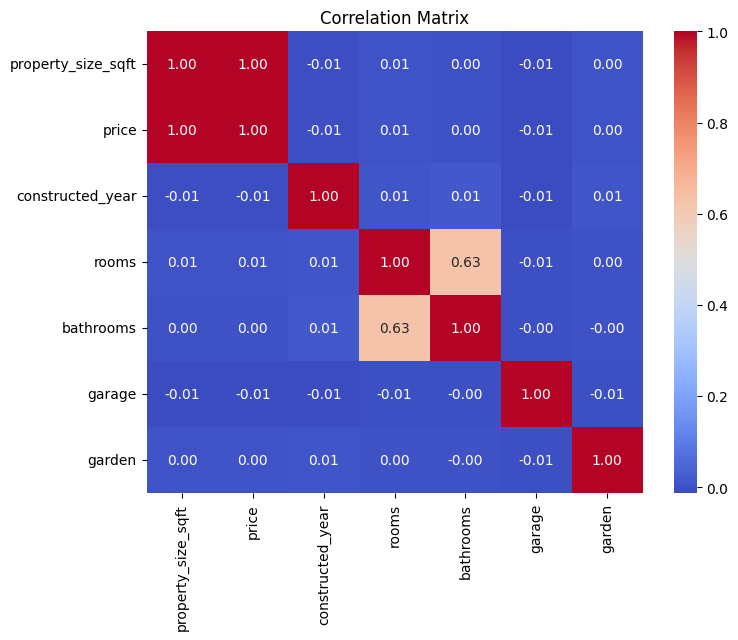

In [460]:
correlation_matrix = df_Singapore.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [461]:
df_Singapore=pd.get_dummies(df_Singapore, columns=['property_type', 'furnishing_status'])
df_Singapore.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
21,Singapore,4175,2926456,2008,2,1,0,1,False,False,False,True,False,False,True,False,False
30,Singapore,3492,2446173,1982,8,1,1,0,False,False,False,False,True,False,False,True,False
55,Singapore,1774,1243943,1992,7,5,0,0,False,False,True,False,False,False,False,False,True
77,Singapore,2272,1594494,2013,8,1,0,1,False,False,False,False,True,False,False,True,False
98,Singapore,4329,3032187,1978,3,2,1,0,False,False,True,False,False,False,True,False,False


In [462]:
df_Japan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              0 non-null      int64  
 1   country                  0 non-null      object 
 2   city                     0 non-null      object 
 3   property_type            0 non-null      object 
 4   furnishing_status        0 non-null      object 
 5   property_size_sqft       0 non-null      int64  
 6   price                    0 non-null      int64  
 7   constructed_year         0 non-null      int64  
 8   previous_owners          0 non-null      int64  
 9   rooms                    0 non-null      int64  
 10  bathrooms                0 non-null      int64  
 11  garage                   0 non-null      int64  
 12  garden                   0 non-null      int64  
 13  crime_cases_reported     0 non-null      int64  
 14  legal_cases_on_property  0 non-null      in

In [463]:
X=df_Singapore.drop(['price', 'country'], axis=1)
y=df_Singapore['price']

In [464]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [465]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.999993502802196
Linier Regresion RMSE :  2880.1302901306503


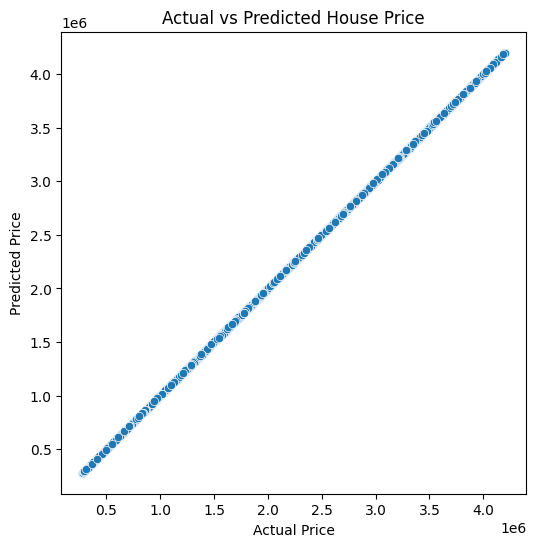

In [466]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [467]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9999848692669155
Decision Tree RMSE :  4395.204384035318


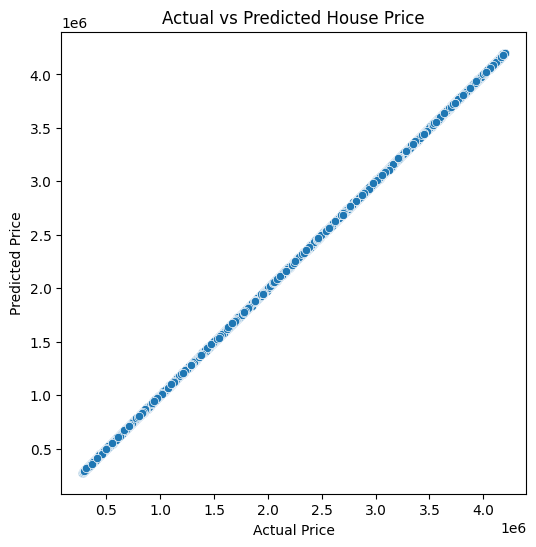

In [468]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [469]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.999991491202091
Random Forest RMSE :  4395.204384035318


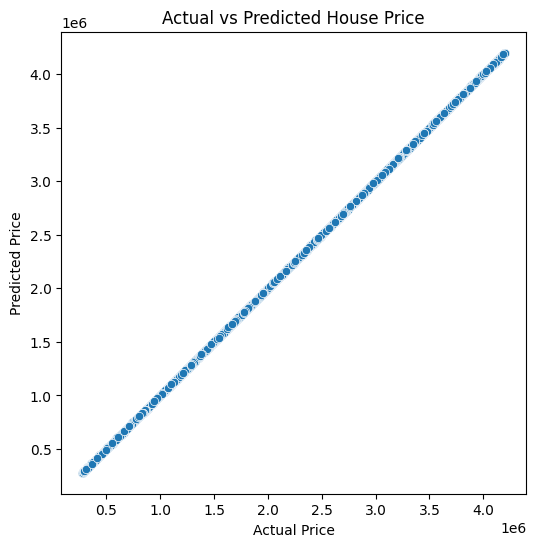

In [470]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [471]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9999484025133847
Gradient Boost RMSE :  4395.204384035318


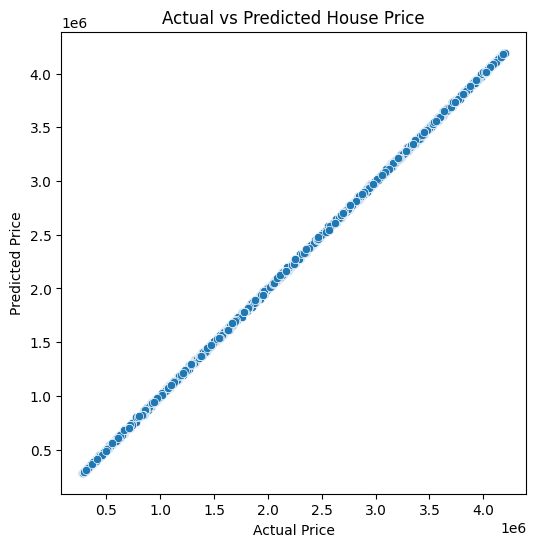

In [472]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [473]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [474]:
result

,metode,R²,RMSE
0,lr,0.999994,2880.130290
1,dt,0.999985,4395.204384
2,rf,0.999991,3295.969579
3,gb,0.999948,8116.398534
